In [1]:
import simos as sos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ground state
GS = {'val': 0 , 'name':'GS'}
# Excited State
ES = {'val': 0 , 'name':'ES'}

nuc = sos.System((GS, ES), method = "numpy")

In [3]:
rates = {}
rates["ES->GS"]  = 4

rates = sos.tidyup_ratedict(nuc, rates)

In [4]:
c_ops = sos.transition_operators(nuc, rates)

In [5]:
dt = 0.1
N = 100

U = sos.evol(0*nuc.id, dt, c_ops = c_ops)

obs  = []
rho = nuc.ESid.copy()
for idx_N in range(N):
    obs.append(np.real(sos.expect(nuc.ESid , rho)))
    rho = sos.applySuperoperator(U, rho)

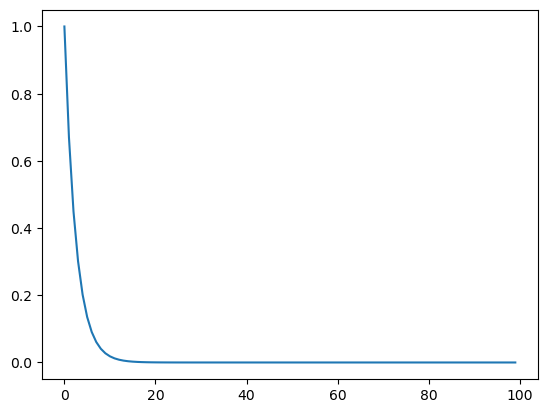

In [6]:
plt.plot(obs)

In [7]:
import lmfit
model = lmfit.models.ExponentialModel()
result = model.fit(np.array(obs), x=np.arange(len(obs))*dt, decay = 1)

<Axes: title={'center': 'Model(exponential)'}, xlabel='x', ylabel='y'>

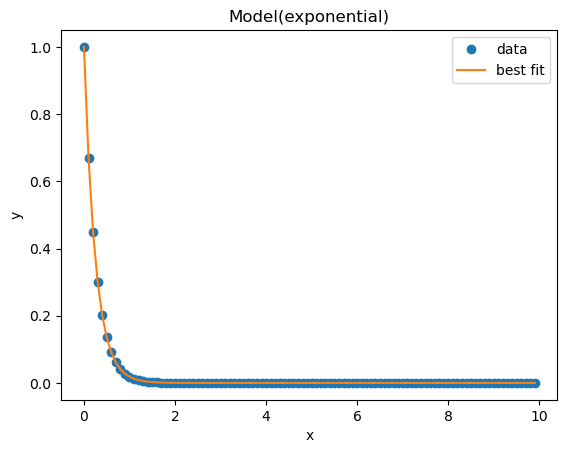

In [8]:
result.plot_fit()

In [9]:
print(result.fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 100
    # variables        = 2
    chi-square         = 7.4197e-29
    reduced chi-square = 7.5711e-31
    Akaike info crit   = -6933.59959
    Bayesian info crit = -6928.38925
    R-squared          = 1.00000000
[[Variables]]
    amplitude:  1.00000000 +/- 7.7734e-16 (0.00%) (init = 1)
    decay:      0.25000000 +/- 3.3153e-16 (0.00%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, decay) = -0.5568


In [10]:
assert np.allclose(result.params['decay'].value, rates["ES->GS"]**-1)